In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/SEER Breast Cancer Dataset .csv')

In [ ]:
df

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),NaN,T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),NaN,T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [ ]:
df.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
Unnamed: 3,4024
T Stage,0
N Stage,0
6th Stage,0
Grade,0
A Stage,0
Tumor Size,0


In [ ]:
df = df.drop(columns=['Unnamed: 3'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder  =  LabelEncoder()
obj_cols  = df.select_dtypes(include = 'object').columns
for col in obj_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

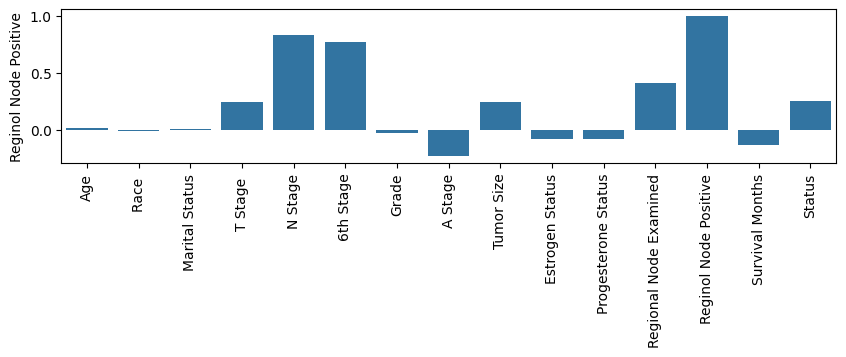

In [ ]:
import seaborn as sns

plt.figure(figsize = (10,2))
cor = df.corr()
sns.barplot(cor['Reginol Node Positive'])
plt.xticks(rotation = 90)
plt.show()

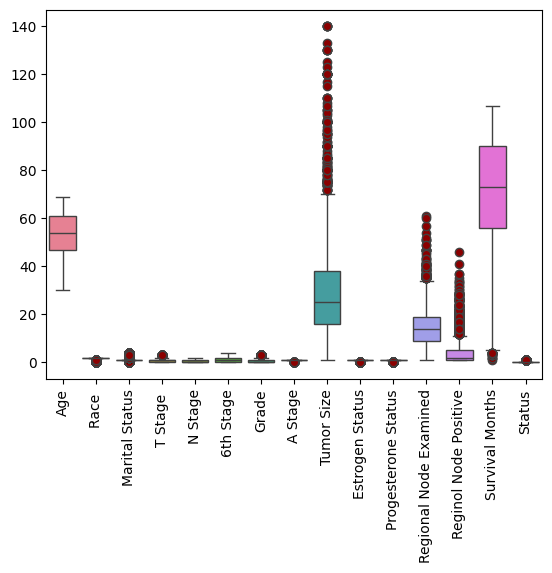

In [ ]:
import seaborn as sns
sns.boxplot(df,flierprops = dict(markerfacecolor = 'darkred'))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Lets remove the outliers now
#IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR =  Q3 - Q1

Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR

for col in df.columns:
    df[col]  = df[col].clip(lower = Lower[col],upper = Upper[col])

In [ ]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
cols = df[['T Stage ', 'N Stage', '6th Stage','Tumor Size','Regional Node Examined']]

from scipy.stats import pointbiserialr


for col in cols:
    corr, p = pointbiserialr(df['Reginol Node Positive'], df[col])
    print(col)
    print("Correlation:", corr, "p-value:", p)
# If correlation ≈ 0 → No linear relationship

# If correlation > 0 → Linear positive relation

# If correlation < 0 → Linear negative relation

# If p < 0.05 → Statistically significant

T Stage 
Correlation: 0.2987440436533172 p-value: 9.483388773616147e-84
N Stage
Correlation: 0.911988296853658 p-value: 0.0
6th Stage
Correlation: 0.8340927562437609 p-value: 0.0
Tumor Size
Correlation: 0.30371300054209904 p-value: 1.2428294655766501e-86
Regional Node Examined
Correlation: 0.36776613616003584 p-value: 4.1535599224574777e-129


In [ ]:
# Hence all the values are having the non linear relation so lets use polynomial regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X = df[['T Stage ', 'N Stage', '6th Stage', 'Tumor Size', 'Regional Node Examined']]
y = df['Reginol Node Positive']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# 5. Fit the regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 6. Predict & output results
y_train_pred = model.predict(X_train_poly)
y_test_pred  = model.predict(X_test_poly)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test  R²:", r2_score(y_test,  y_test_pred))

# 7. If you want to *get output/predictions* for new data:
# Suppose you have new_data_df with same feature columns:
# new_data_poly = poly.transform(new_data_df[['T Stage', ...]])
# new_predictions = model.predict(new_data_poly)


Train R²: 0.8442530477492781
Test  R²: 0.8516872245904672


In [ ]:
new_data = [[2, 1, 3, 25, 10]]

new_array = np.array(new_data)

# 1. Transform with same poly object
new_transformed = poly.transform(new_array)

# 2. Predict
new_prediction = model.predict(new_transformed)

print("Predicted Regional Node Positive:", int(new_prediction))


Predicted Regional Node Positive: 7


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/tmp/ipython-input-324831318.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted Regional Node Positive:", int(new_prediction))


In [ ]:
!pip install --upgrade gradio
import gradio as gr

In [ ]:
import gradio as gr

def predict_nodes(t_stage, n_stage, sixth_stage, tumor_size, regional_node_examined):
    # Assuming you have already loaded/trained your model and transformer
    X_new = [[t_stage, n_stage, sixth_stage, tumor_size, regional_node_examined]]
    X_new_poly = poly.transform(X_new)   # if you used PolynomialFeatures
    y_new = model.predict(X_new_poly)
    return float(y_new[0])
custom_css = """
body { background: #f9f9f9; font-family: 'Arial', sans-serif; }
.gradio-container { border: 1px solid #e0e0e0; border-radius: 12px; padding: 20px; }
h1 { color: #2c3e50; }
"""


interface = gr.Interface(
    fn=predict_nodes,
    inputs=[
        gr.Number(label='T Stage'),
        gr.Number(label='N Stage'),
        gr.Number(label='6th Stage'),
        gr.Number(label='Tumor Size'),
        gr.Number(label='Regional Node Examined')
    ],
    outputs=gr.Number(label="Predicted Regional Positive Nodes"),
    title= "Regional Node Positivity Calculator",
    description="Enter your values to estimate how many regional positive nodes might be present.",
    css=custom_css

)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7865ae85c38f8111d2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
